INF-385T Applied Data Mining - SP16 
--
Homework 2
--

Feb 25,2016

Yimeng Zhao
yz9428


1.perceptron
------
(a) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random, itertools
random.seed(a=42)

/Users/apple/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/apple/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
class Perceptron:
    'A simple Perceptron implementation.'
    def __init__(self, weights, bias, alpha=0.1):
        self.weights = weights
        self.bias = bias
        self.alpha = alpha
    
    def propagate(self, x):
        return self.activation(self.net(x)) 
        
    def activation(self, net):
        if net > 0:
            return 1
        return 0
    
    def net(self, x):
        return np.dot(self.weights, x) + self.bias
    
    def learn(self, x, y):
        y_hat = self.propagate(x)
        self.weights = [w_i + self.alpha*x_i*(y-y_hat) for (w_i, x_i) in zip(self.weights, x)]
        self.bias = self.bias + self.alpha*(y-y_hat)
        return np.abs(y_hat - y)

In [3]:
size = 50 # size of data set
data = pd.DataFrame(columns=('$x_1$', '$x_2$'),
                    data=np.random.uniform(size=(size,2)))
data.head(10)

,$x_1$,$x_2$
0,0.793035,0.388565
1,0.344014,0.572290
2,0.748423,0.501732
3,0.857642,0.280216
4,0.980780,0.510175
5,0.364969,0.404745
6,0.032500,0.363431
7,0.437177,0.710449
8,0.042501,0.297588
9,0.434145,0.958963


In [4]:
def condition(x):
    return int(np.sum(x) > 1)
data['y'] = data.apply(condition, axis=1)
data.head(10)

,$x_1$,$x_2$,y
0,0.793035,0.388565,1
1,0.344014,0.572290,0
2,0.748423,0.501732,1
3,0.857642,0.280216,1
4,0.980780,0.510175,1
5,0.364969,0.404745,0
6,0.032500,0.363431,0
7,0.437177,0.710449,1
8,0.042501,0.297588,0
9,0.434145,0.958963,1


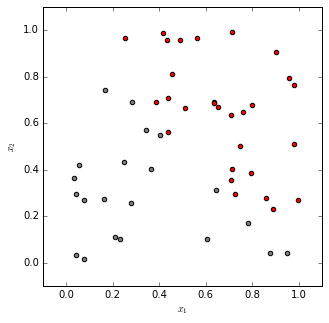

In [5]:
def plot_data(data, ax):
    data[data.y==1].plot(kind='scatter', x='$x_1$', y='$x_2$', color='Red', ax=ax)
    data[data.y==0].plot(kind='scatter', x='$x_1$', y='$x_2$', color='Gray', ax=ax)
    ax.set_xlim(-0.1,1.1); ax.set_ylim(-0.1,1.1)

fig = plt.figure(figsize=(5,5))
ax = fig.gca()
plot_data(data, ax)

In [6]:
def learn_data(perceptron, data):
    'Returns the number of errors made.'
    count = 0 
    for i, row in data.iterrows():
        count += perceptron.learn(row[0:2], row[2])
    return count

In [7]:
def threshold(perceptron, x_1):
    return (-perceptron.weights[0] * x_1 - perceptron.bias) / perceptron.weights[1]

def plot_perceptron_threshold(perceptron, ax):
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    x2s = [threshold(perceptron, x1) for x1 in xlim]
    ax.plot(xlim, x2s)
    ax.set_xlim(-0.1,1.1); ax.set_ylim(-0.1,1.1)

def plot_all(perceptron, data, t, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()
    plot_data(data, ax)
    plot_perceptron_threshold(perceptron, ax)
    
    ax.set_title('$t='+str(t+1)+'$')

In [8]:
def calc_error(perceptron, data):
    X = data[['$x_1$', '$x_2$']].values
    y = data.y
    preds = [perceptron.propagate(X[i]) for i in range(X.shape[0])]
    err = sum([int(preds[i] != y[i]) for i in range(X.shape[0])])
    return err*1.0/X.shape[0]


1  error:  0.08
2  error:  0.12
3  error:  0.44
4  error:  0.06
5  error:  0.44
6  error:  0.2


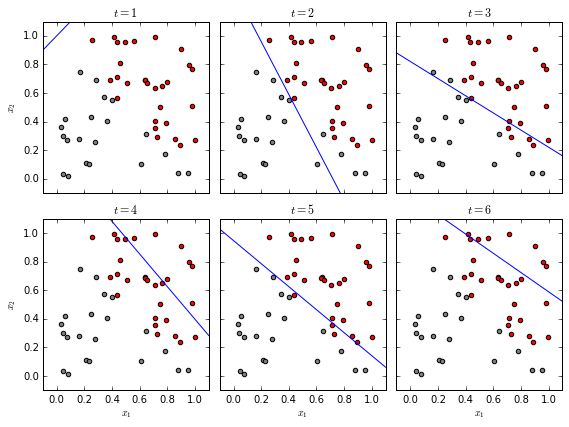

In [14]:
# vanilla perceptron
perceptron = Perceptron([0.1,-0.1],0.1)
errors = 0
f, axarr = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8,6))
axs = list(itertools.chain.from_iterable(axarr))
for t in range(6):
    plot_all(perceptron, data, t, ax=axs[t])
    learn_data(perceptron, data)
    errors=calc_error(perceptron, data)
    print (t+1,' error: ',errors)
f.tight_layout()


1  error:  0.08
2  error:  0.12
3  error:  0.58
4  error:  0.5
5  error:  0.56
6  error:  0.54


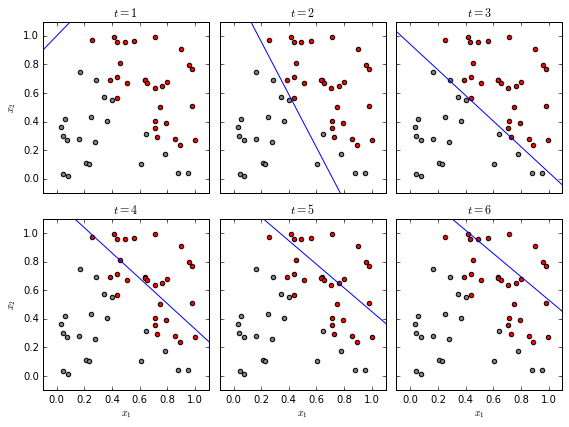

In [16]:
# averaged perceptron
# ideas: the ith perceptron.weight = average of all the weights from t(0) to t(i-1)
perceptron = Perceptron([0.1,-0.1],0.1)

f1, axarr = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8,6))
axs = list(itertools.chain.from_iterable(axarr))

temp_w_a = []
temp_b_a = []
sum_w_a = [0,0]
sum_b_a = [0]
for t in range(6):
    plot_all(perceptron, data, t, ax=axs[t])
    learn_data(perceptron, data)
    errors_a = calc_error(perceptron, data) 
    print (t+1,' error: ',errors_a)
    temp_w_a.append(perceptron.weights)      
    temp_b_a.append(perceptron.bias)         
    sum_w_a = [i+j for i,j in zip(sum_w_a,temp_w_a[t])]  # sum of all weights
    #print sum_w
    sum_b_a += temp_b_a[t]                             # sum of all bias
    #print sum_b
    ave_w_a = [i/(t+1) for i in sum_w_a]          # average of all weights
    ave_b_a = sum_b_a/(t+1)                       # average of all bias
    perceptron.weights = ave_w_a                  # perceptrion.weights = average of weights
    perceptron.bias = ave_b_a                     # perceptrion.bias = average of bias

f1.tight_layout()
    

The performance is not better.  

(b) weighted averaged perceptron.

1  error:  0.08
2  error:  0.12
3  error:  0.58
4  error:  0.58
5  error:  0.58
6  error:  0.58


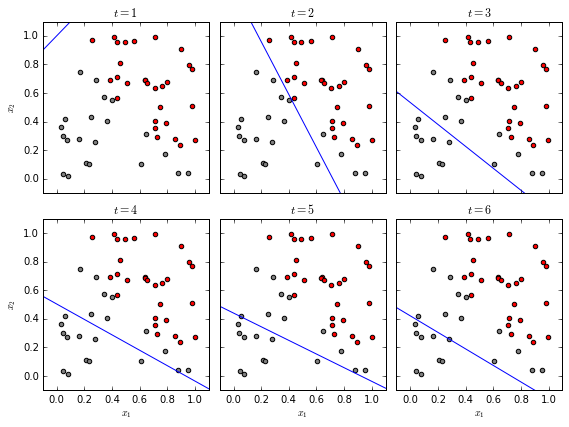

In [17]:
# weighted averaged perceptron

perceptron = Perceptron([0.1,-0.1],0.1)

f2, axarr = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8,6))
axs = list(itertools.chain.from_iterable(axarr))

t_sum = 0
sum_w_b = [0,0]
sum_b_b = [0]
for t in range(6):
    plot_all(perceptron, data, t, ax=axs[t])
    learn_data(perceptron, data)
    errors_b = calc_error(perceptron, data)
    print (t+1,' error: ',errors_b)
    temp_w_b = perceptron.weights     
    temp_b_b =  perceptron.bias 
    t_sum += (t+1)
    sum_w_b = [i+j*(t+1) for i,j in zip(sum_w_b,temp_w_b)]  # sum of all weights
    #print sum_w_b
    sum_b_b += temp_b_b                             # sum of all bias
    #print sum_b_b
    ave_w_b = [i/(t+1)/t_sum for i in sum_w_b]            # average of all weights
    #print ave_w_b
    
    ave_b_b = sum_b_b/(t+1)/t_sum            # average of all bias
    perceptron.weights = ave_w_b                  # perceptrion.weights = average of weights
    perceptron.bias = ave_b_b                     # perceptrion.bias = average of bias
    
f2.tight_layout()

From all the figures, weighted averaged perceptron is better than averaged perceptron, but worse than vallina.

(c)

In [15]:
import sklearn
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Perceptron as pcp


X, Y = make_classification(n_samples=1000,n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
data_train = pd.DataFrame(columns=('$x_1$', '$x_2$'),data=X[500:])
data_test = pd.DataFrame(columns=('$x_1$', '$x_2$'),data=X[:500])
data_train['y'] = Y[500:]
data_test['y'] = Y[:500]

data_train.head()

,$x_1$,$x_2$,y
0,2.326817,-2.573748,0
1,0.523809,0.407740,1
2,0.786178,-0.883584,0
3,1.811549,-2.040730,0
4,0.318809,0.150116,0


 error:  0.088
 error:  0.09
 error:  0.102
 error:  0.084
 error:  0.09
 error:  0.09


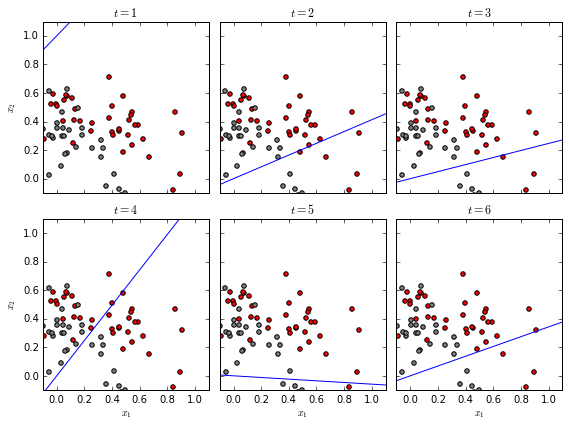

In [16]:
# vanilla perceptron
perceptron = Perceptron([0.1,-0.1],0.1)

f, axarr = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8,6))
axs = list(itertools.chain.from_iterable(axarr))

errors = 0
for t in range(6):
    plot_all(perceptron, data_train, t, ax=axs[t])
    learn_data(perceptron, data_train)
    errors=calc_error(perceptron, data_test)
    print ' error: ',errors
    
f.tight_layout()

0 error:  0.088
1 error:  0.09
2 error:  0.086
3 error:  0.09
4 error:  0.088
5 error:  0.102


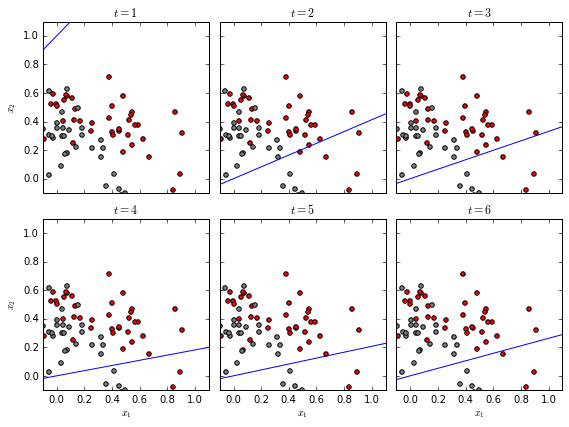

In [17]:
# averaged perceptron
perceptron = Perceptron([0.1,-0.1],0.1)

f1, axarr = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8,6))
axs = list(itertools.chain.from_iterable(axarr))

errors_a=0
sum_w_a = [0,0]
sum_b_a = [0]
for t in range(6):
    plot_all(perceptron, data_train, t, ax=axs[t])
    learn_data(perceptron, data_train)
    errors_a = calc_error(perceptron, data_test) 
    temp_w_a = perceptron.weights      
    temp_b_a = perceptron.bias         
    sum_w_a = [i+j for i,j in zip(sum_w_a,temp_w_a)]  # sum of all weights
    #print sum_w
    sum_b_a += temp_b_a                             # sum of all bias
    #print sum_b
    ave_w_a = [i/(t+1) for i in sum_w_a]            # average of all weights
    ave_b_a = sum_b_a/(t+1)             # average of all bias
    perceptron.weights = ave_w_a                  # perceptrion.weights = average of weights
    perceptron.bias = ave_b_a                     # perceptrion.bias = average of bias
    print t,"error: ",errors_a
    
f1.tight_layout()

1  error:  0.088
2  error:  0.09
3  error:  0.084
4  error:  0.086
5  error:  0.086
6  error:  0.086


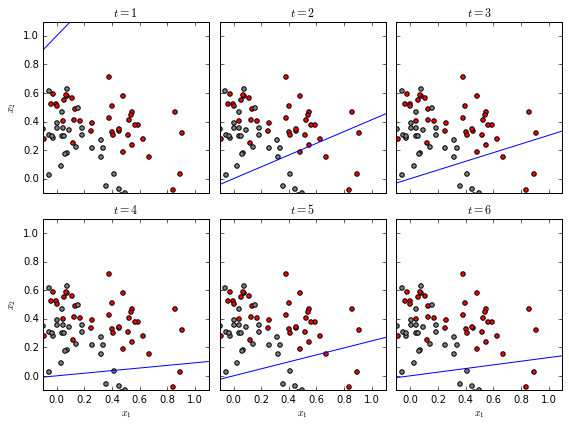

In [18]:
# weighted averaged perceptron
perceptron = Perceptron([0.1,-0.1],0.1)

f2, axarr = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8,6))
axs = list(itertools.chain.from_iterable(axarr))

sum_w_b = [0,0]
sum_b_b = [0]
t_sum = 0
for t in range(6):
    plot_all(perceptron, data_train, t, ax=axs[t])
    learn_data(perceptron, data_train)
    errors_b = calc_error(perceptron, data_test) 
    print t+1,' error: ',errors_b
    temp_w_b = perceptron.weights     
    temp_b_b =  perceptron.bias          
    sum_w_b = [i+j*(t+1) for i,j in zip(sum_w_b,temp_w_b)]  # sum of all weights
    #print sum_w_b
    sum_b_b += temp_b_b                             # sum of all bias
    #print sum_b_b
    t_sum += (t+1) 
    ave_w_b = [i/(t+1)/t_sum for i in sum_w_b]            # average of all weights
    ave_b_b = sum_b_b/(t+1)/t_sum             # average of all bias
    perceptron = Perceptron(ave_w_b,ave_b_b)

f2.tight_layout()   

The averaged one is the worst of the three. The vanilla perceptron is the best.

2.Naive Bayes
------------------------------------------

(a)
From figure 1,

row    circle     square    triangle   |  C

1       1           4         1       |  1

2       1           1         4       |  -1

3       0           1         3       |  -1

4       0           4         1       |  1

5       1           3         1       |  ?


The first 4 rows are training data, the last row is test data.

P(C=-1)=P(C=1)=.5

P(circle|C=-1) = (1+1)/(10+3)=2/13, P(square|C=-1) = (2+1)/(10+3)=3/13, P(triangle|C=-1) = (7+1)/(10+3)=8/13

P(circle|C=1) = (1+1)/(11+3)=2/14, P(square|C=1) = (8+1)/(11+3)=9/14, P(triangle|C=1) = (2+1)/(11+3)=3/14

(b)

P(C=-1|row5) = P(C=-1) * P(circle|C=-1)^1 * P(square|C=-1)^3 * P(triangle|C=-1)^1 = .5 * (2/13) * (3/13)^3 * (8/13) = 0.000582

P(C=1|row5) = P(C=1) * P(circle|C=1)^1 * P(square|C=1)^3 * P(triangle|C=1)^1 = .5 * (2/14) * (9/14)^3 * (3/14) = 0.004066

P(C=1|row5) > P(C=-1|row5), therefore, row 5 should be C=1. 

In [17]:
p1 = 0.5 * 2 * 3**3 * 8 / 13**5 
print p1

p2 = 0.5 * 2 * 9**3 * 3/ 14**5
print p2

0.000581750800581
0.00406638602963


3.Logistic Regression in sklearn
--
(a)Compare Naive Bayes and Logistic Regression in perdictive performance

In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_files
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
dataset = load_files("movie-reviews/")
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [3]:
docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

In [4]:
vectorizer = CountVectorizer(stop_words="english")
# fit the vectorizer to the training documents
X_train = vectorizer.fit_transform(docs_train)

In [5]:
# fit the model
modelNB = MultinomialNB()
modelNB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [6]:
X_test = vectorizer.transform(docs_test)
y_hatNB = modelNB.predict(X_test)

In [90]:
print("accuracy is: ", metrics.accuracy_score(y_test, y_hatNB))
#print'classification report: ', metrics.classification_report(y_test, y_hatNB)

('accuracy is: ', 0.81999999999999995)


In [7]:
# Logistic Regression 
modelLR=sklearn.linear_model.LogisticRegression()
modelLR.fit(X_train, y_train)

NameError: name 'sklearn' is not defined

In [92]:
X_test = vectorizer.transform(docs_test)
y_hatLR = modelLR.predict(X_test)

In [147]:
print("accuracy is: ", modelLR.score(X_test, y_test))
#print'classification report: ', metrics.classification_report( y_test,y_hatLR)

('accuracy is: ', 0.83599999999999997)


Logistic regression is better than Naive Bayes

(b)  CountVectorizer binary encoding for LR

In [174]:
vectorizer2 = CountVectorizer(binary=True,stop_words="english")
X_train2 = vectorizer2.fit_transform(docs_train)
modelLR=sklearn.linear_model.LogisticRegression()
modelLR.fit(X_train2, y_train)
X_test2 = vectorizer.transform(docs_test)
y_hatLR2 = modelLR.predict(X_test2)
print("accuracy is: ", modelLR.score(X_test2, y_test))
#print'classification report: ', metrics.classification_report( y_test,y_hatLR)

('accuracy is: ', 0.82799999999999996)


performance is still better than NB but worse than LR without binary

(c)cross-fold validation

In [93]:
from sklearn import cross_validation
from sklearn import svm

In [94]:
scores_NB = sklearn.cross_validation.cross_val_score(modelNB,X_test, y_test,cv=10)
scores_LR = sklearn.cross_validation.cross_val_score(modelLR,X_test, y_test,cv=10)

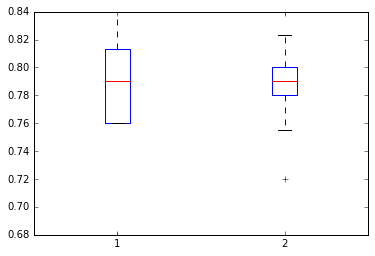

In [95]:
plt.boxplot([scores_NB,scores_LR])
plt.show()

NB has a larger range, which means its performance is not as stable as LR. LR's average score is very close to NB's. Therefore, LR's performance is better.